In [8]:
import sklearn
from rdkit.Chem import PandasTools, Descriptors, MolFromSmiles
from pandas import DataFrame
from sklearn.model_selection import train_test_split

from sklearn import svm
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data_file = open("../data/gr_alpha.csv")
data_file.readline()
raw_data = [line.strip().split(",") for line in data_file]
mols = [(int(spls[0]),spls[2],float(spls[1])) for spls in raw_data]

In [3]:
desc_list = Descriptors.descList
# desc_list = [x for x in desc_list if x[0] in compute_descriptors]

data = DataFrame(mols, columns=["id","smi","ic50"])
data.set_index("id")

for desc_name, function in desc_list:
    values = []
    for smiles in data["smi"]:
        mol = MolFromSmiles(smiles)
        values.append(function(mol))
    data[desc_name] = values
# we convert the IC50 values to pIC50 which is defined as the negative logarithm
# with base 10 of the concentration in moles rather than nanomoles 
data["pic50"] = data.ic50.apply(lambda x : -1.0 * np.log10(x / 1.0e9))

In [50]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame, concat

def scale_df(frame, scaler):
    return DataFrame(scaler.transform(frame), columns=frame.columns)

scaler = StandardScaler(copy=False)
scaler.fit(concat( (train_data.iloc[:,3:], test_data.iloc[:,3:]) ))

descriptors_train = scale_df(train_data.iloc[:,3:], scaler)
descriptors_train.index = train_data.index
descriptors_test = scale_df(test_data.iloc[:,3:], scaler)
descriptors_test.index = test_data.index
print(descriptors_train.shape, descriptors_test.shape)
descriptors_train.head()

(995, 197) (332, 197)


,MinPartialCharge,MinAbsPartialCharge,NumRadicalElectrons,NumValenceElectrons,MolWt,ExactMolWt,MaxPartialCharge,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pic50
413,1.696602,0.117612,0.0,-0.045838,-0.370300,-0.368712,0.101792,0.979778,-3.628434,3.544903,...,-0.228778,-0.087138,-0.110474,-0.084045,-0.143972,0.0,-0.287081,-0.174940,-0.095527,-0.779251
443,-0.470379,0.559673,0.0,1.126177,1.130193,1.131787,0.534875,-2.905436,0.695890,-0.680298,...,4.371048,-0.087138,-0.110474,-0.084045,-0.143972,0.0,-0.287081,6.273531,-0.095527,-1.355364
848,2.795579,-0.669290,0.0,-0.866249,-1.048655,-1.047329,-0.669130,0.644019,0.317887,0.402398,...,-0.228778,-0.087138,-0.110474,-0.084045,-0.143972,0.0,-0.287081,-0.174940,-0.095527,-0.315810
244,-0.494697,-0.889125,0.0,1.008976,1.006847,1.007995,-0.884501,0.366206,-0.857331,-0.550961,...,-0.228778,-0.087138,-0.110474,-0.084045,-0.143972,0.0,-0.287081,-0.174940,-0.095527,0.010380
275,-0.495403,2.427348,0.0,-0.045838,0.000559,0.001992,2.364622,-3.516712,0.896824,-0.173047,...,4.371048,-0.087138,-0.110474,-0.084045,-0.143972,0.0,-0.287081,-0.174940,-0.095527,0.715083


In [40]:
train_data, test_data = train_test_split(data)
[x[0] for x in desc_list]

['MinPartialCharge',
 'MinAbsPartialCharge',
 'NumRadicalElectrons',
 'NumValenceElectrons',
 'MolWt',
 'ExactMolWt',
 'MaxPartialCharge',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'HeavyAtomMolWt',
 'MaxAbsPartialCharge',
 'MaxEStateIndex',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA8',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'SlogP_VSA7',
 'SlogP_VSA8',
 'SlogP_VSA9',
 'TPS

In [41]:
columns = [x[0] for x in desc_list[:13]]
columns.extend([x[0] for x in desc_list[15:27]])
columns

['MinPartialCharge',
 'MinAbsPartialCharge',
 'NumRadicalElectrons',
 'NumValenceElectrons',
 'MolWt',
 'ExactMolWt',
 'MaxPartialCharge',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'HeavyAtomMolWt',
 'MaxAbsPartialCharge',
 'MaxEStateIndex',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v']

In [43]:
params = {
        'C': [1, 10, 100, 1000]
        , 'epsilon': [0.0, 0.1, 0.2, 0.3, 0.4]
        , 'gamma': [1.0, 0.1, 0.01, 0.001]
        , 'kernel': ['rbf']
    }

model = svm.SVR(C=1, epsilon=0.1, gamma=0.01, kernel="rbf")
model.fit(train_data[columns], train_data["pic50"]) 

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

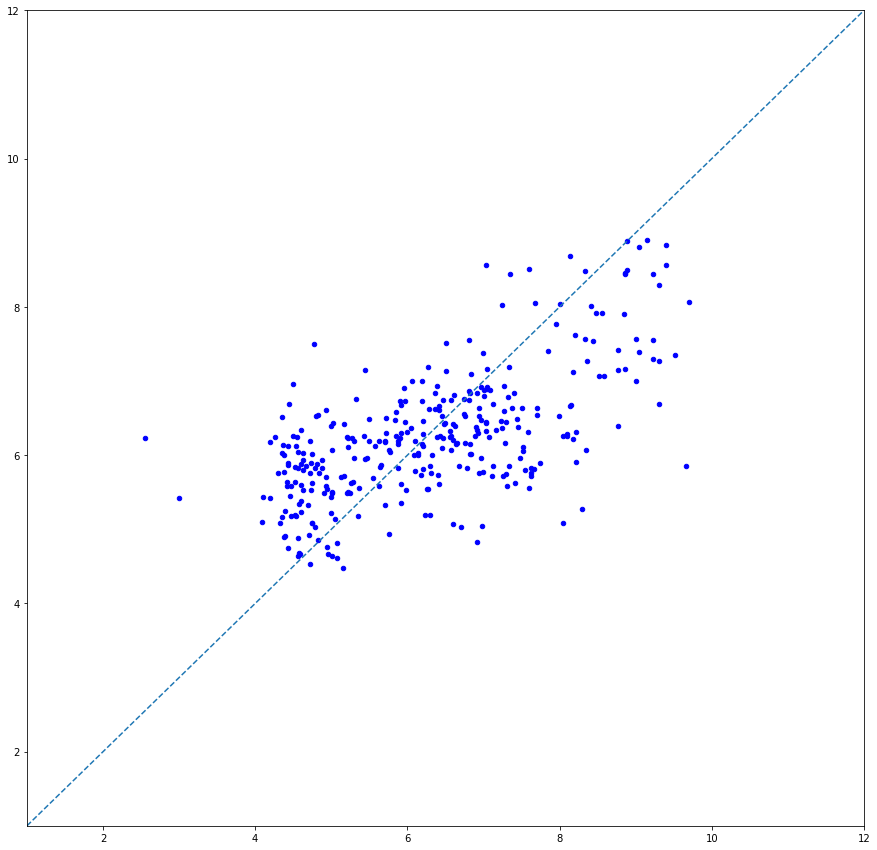

In [44]:
plt.rcParams["figure.figsize"] = [15, 15]
span = (1,12)
axes = plt.gca()
axes.set_xlim(span)
axes.set_ylim(span)

plt.plot((span[0],span[1]), (span[0],span[1]), linestyle='--')

# plt.scatter(
#     pIC50_train
#     , model.predict(descriptors_train)
#     , c='green'
#     , s=20
# )

plt.scatter(
    test_data["pic50"]
    , model.predict(test_data[columns])
    , c='blue'
    , s=20
)
plt.show()

In [23]:
print("R^2: %0.2f" % model.score(test_data[columns], test_data.pic50))
print("R: %0.2f" % np.sqrt(model.score(test_data[columns], test_data.pic50)))
print("MSE: %0.2f" %  mean_squared_error(model.predict(test_data[columns]), test_data.pic50))

R^2: 0.24
R: 0.49
MSE: 1.38


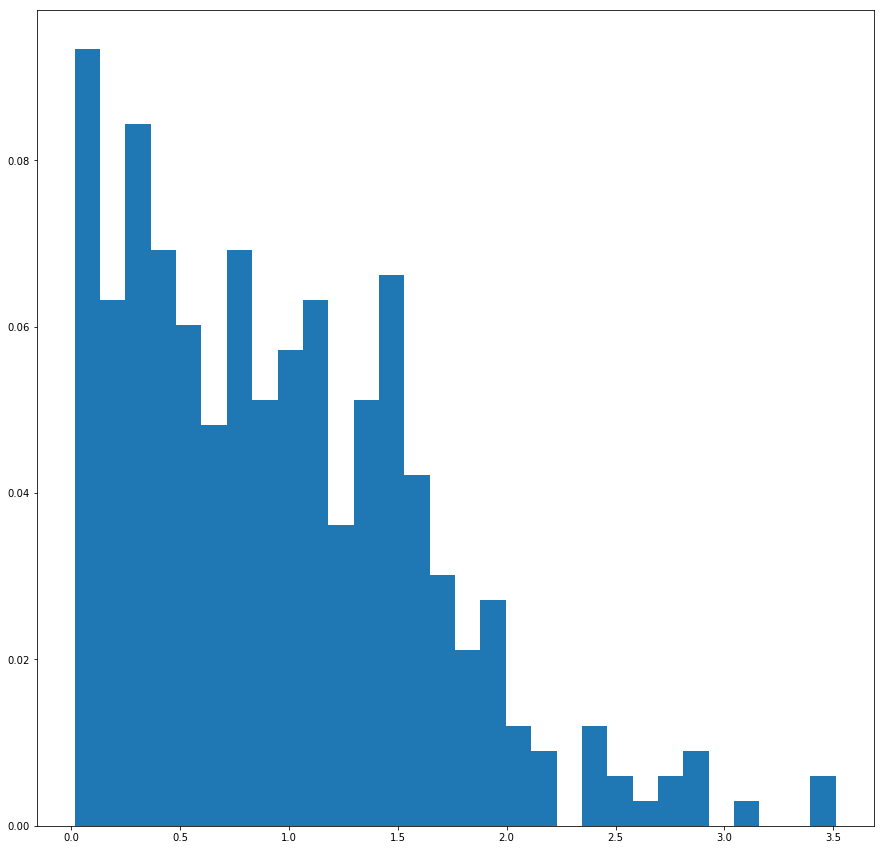

In [24]:
errors = (test_data.pic50 - model.predict(test_data[columns])).abs()
weights = np.ones_like(errors) / len(errors)
plt.hist(errors, weights=weights, bins=30)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(train_data[columns], train_data["pic50"])

In [ ]:
plt.rcParams["figure.figsize"] = [15, 15]
span = (1,12)
axes = plt.gca()
axes.set_xlim(span)
axes.set_ylim(span)

fig = plt.plot((span[0],span[1]), (span[0],span[1]), linestyle='--')

# plt.scatter(
#     pIC50_train
#     , model.predict(descriptors_train)
#     , c='green'
#     , s=20
# )

plt.scatter(
    test_data["pic50"]
    , model2.predict(test_data[columns])
    , c='blue'
    , s=20
)
fig

In [28]:
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV

param_grid = [
    {
        'C': [1, 10, 100, 1000]
        , 'epsilon': [0.0, 0.1, 0.2, 0.3, 0.4]
        , 'gamma': [1.0, 0.1, 0.01, 0.001]
        , 'kernel': ['rbf']
    },
]

gs = GridSearchCV(SVR(), param_grid, n_jobs=2, cv=10)
gs.fit(train_data[columns], train_data.pic50)
model3 = SVR(**gs.best_estimator_.get_params())
gs.best_estimator_.get_params()

{'C': 1,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.4,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [29]:
model3

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.4, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)